## Introdução à Base de Dados de Risco de Crédito

Esta base de dados tem como objetivo principal auxiliar na análise de risco de crédito, permitindo prever a probabilidade de inadimplência de um cliente com base em variáveis pessoais, financeiras e comportamentais.

### Estrutura Geral

- **Total de registros:** 32.581  
- **Total de colunas:** 12  
- **Colunas com valores nulos:**
  - `person_emp_length`: 895 registros ausentes
  - `loan_int_rate`: 3.116 registros ausentes

### Dicionário de Dados

| Coluna                       | Tipo       | Descrição |
|-----------------------------|------------|-----------|
| `person_age`                | int64      | Idade da pessoa solicitante |
| `person_income`             | int64      | Renda anual da pessoa |
| `person_home_ownership`     | object     | Tipo de posse da residência (OWN, RENT, MORTGAGE, etc.) |
| `person_emp_length`         | float64    | Tempo de emprego (em anos) |
| `loan_intent`               | object     | Finalidade do empréstimo (MEDICAL, EDUCATION, PERSONAL, etc.) |
| `loan_grade`                | object     | Classificação de risco do empréstimo |
| `loan_amnt`                 | int64      | Valor solicitado no empréstimo |
| `loan_int_rate`             | float64    | Taxa de juros aplicada ao empréstimo |
| `loan_status`               | int64      | Indicador de inadimplência (1 = inadimplente, 0 = adimplente) |
| `loan_percent_income`       | float64    | Percentual da renda comprometida com o empréstimo |
| `cb_person_default_on_file` | object     | Registro anterior de inadimplência no cadastro de crédito (Y/N) |
| `cb_person_cred_hist_length`| int64      | Duração do histórico de crédito (em anos) |

### Considerações Iniciais

A presença de valores nulos nas colunas `person_emp_length` e `loan_int_rate` deve ser tratada antes da modelagem ou análise preditiva. O dataset é bem estruturado para tarefas de classificação binária, como prever inadimplência com base em atributos do solicitante e características do empréstimo.


## Bibliotecas

- importando bibliotecas de manipulação de Dados
- importando bibliotecas de visualisação de dados


In [57]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df_credit = pd.read_csv("/content/credit_risk_dataset.csv")

In [85]:
df_credit

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## Primeira análise dos Dados

In [86]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [87]:
# Olhando dados únicos
print(df_credit.nunique())
# Olhando o início do DF
print(df_credit.head())

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02           

## Mais explorações

In [88]:
# Explorando distribuições dos dados
np.unique(df_credit['loan_status'], return_counts=True)


(array([0, 1]), array([25473,  7108]))

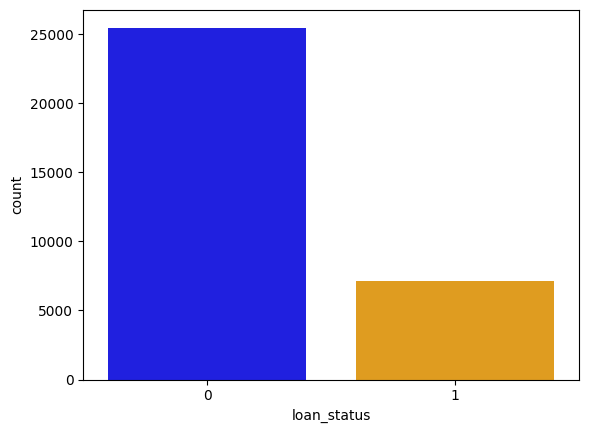

In [89]:
sns.countplot(x=df_credit['loan_status'],  palette=['blue', 'orange']);

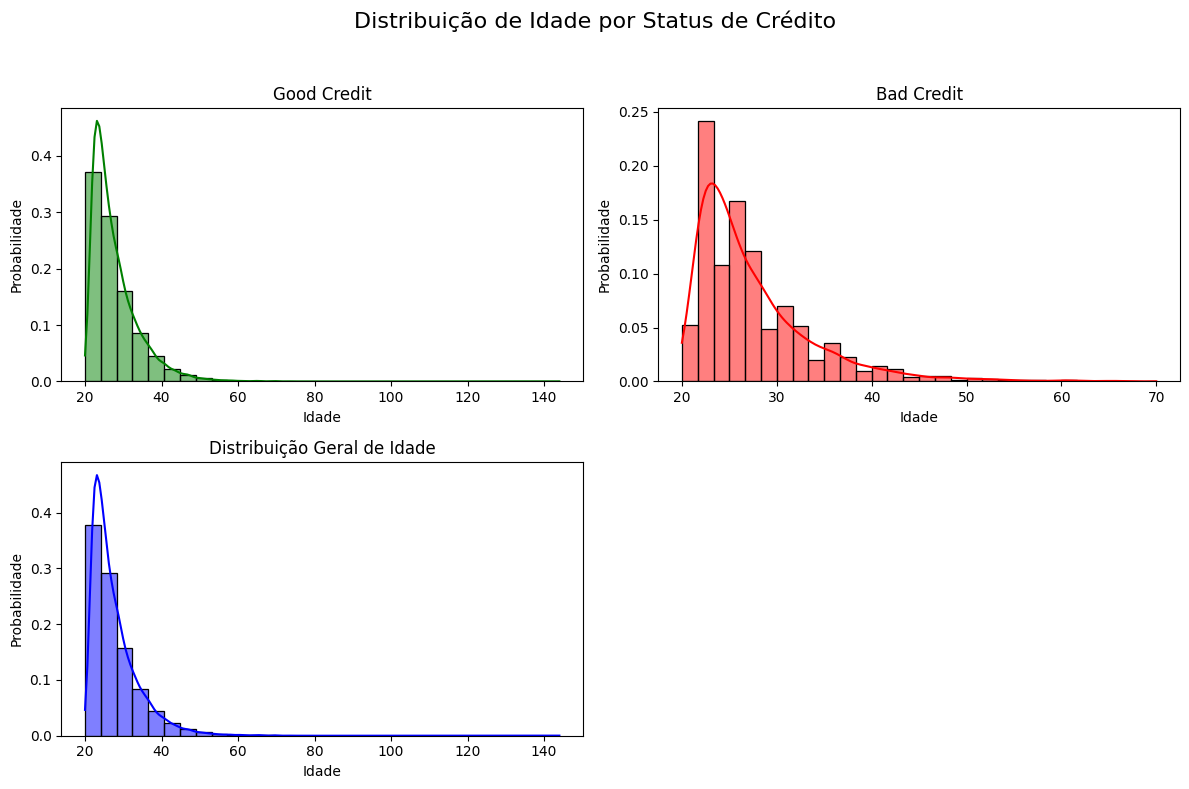

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns



df_good = df_credit[df_credit["loan_status"] == 0]["person_age"]
df_bad = df_credit[df_credit["loan_status"] == 1]["person_age"]
df_age = df_credit["person_age"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribuição de Idade por Status de Crédito', fontsize=16)

sns.histplot(df_good, bins=30, stat='probability', kde=True, color='green', ax=axes[0, 0])
axes[0, 0].set_title('Good Credit')
axes[0, 0].set_xlabel('Idade')
axes[0, 0].set_ylabel('Probabilidade')

sns.histplot(df_bad, bins=30, stat='probability', kde=True, color='red', ax=axes[0, 1])
axes[0, 1].set_title('Bad Credit')
axes[0, 1].set_xlabel('Idade')
axes[0, 1].set_ylabel('Probabilidade')

sns.histplot(df_age, bins=30, stat='probability', kde=True, color='blue', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição Geral de Idade')
axes[1, 0].set_xlabel('Idade')
axes[1, 0].set_ylabel('Probabilidade')

axes[1, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


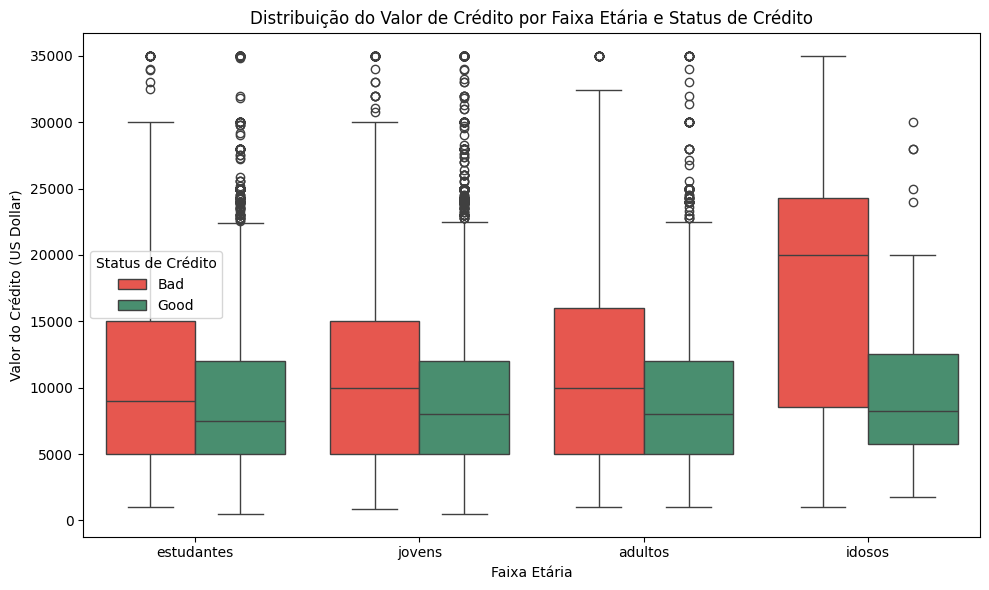

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt


idades = (18, 25, 35, 60, 120)
faixa_idade = ['estudantes', 'jovens', 'adultos', 'idosos']
df_credit["faixa_idade"] = pd.cut(df_credit["person_age"], idades, labels=faixa_idade)


df_credit["loan_status"] = df_credit["loan_status"].map({0: 'Good', 1: 'Bad'})

valor_coluna_credito = "loan_amnt"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_credit, x="faixa_idade", y=valor_coluna_credito, hue="loan_status", palette={"Good": "#3D9970", "Bad": "#FF4136"})

plt.title("Distribuição do Valor de Crédito por Faixa Etária e Status de Crédito")
plt.xlabel("Faixa Etária")
plt.ylabel("Valor do Crédito (US Dollar)")
plt.legend(title="Status de Crédito")
plt.tight_layout()
plt.show()


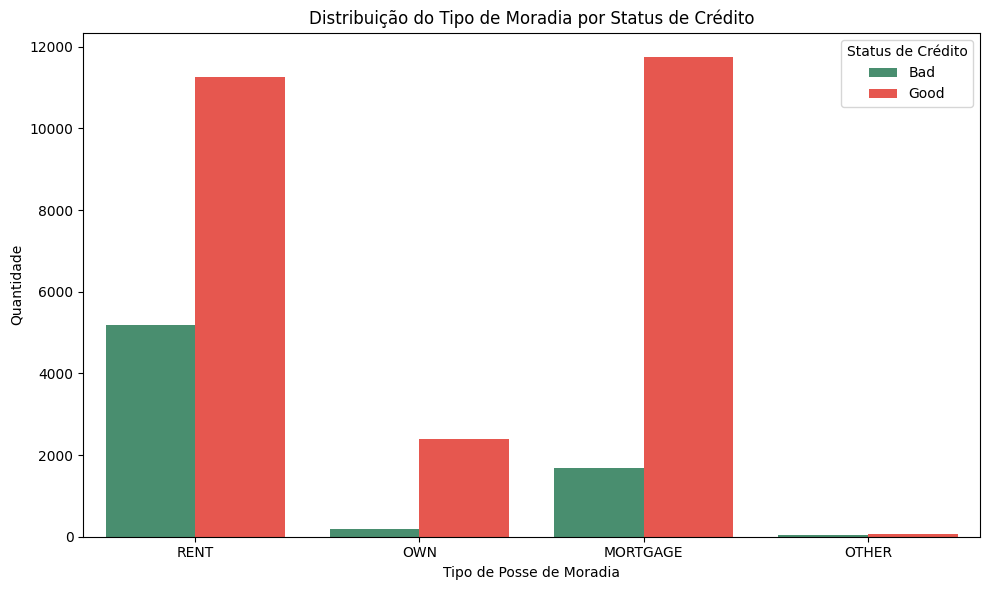

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Garantir que a coluna loan_status esteja com rótulos legíveis
df_credit["loan_status"] = df_credit["loan_status"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_credit, x="person_home_ownership", hue="loan_status", palette={"#3D9970","#FF4136"})

plt.title("Distribuição do Tipo de Moradia por Status de Crédito")
plt.xlabel("Tipo de Posse de Moradia")
plt.ylabel("Quantidade")
plt.legend(title="Status de Crédito")
plt.tight_layout()
plt.show()


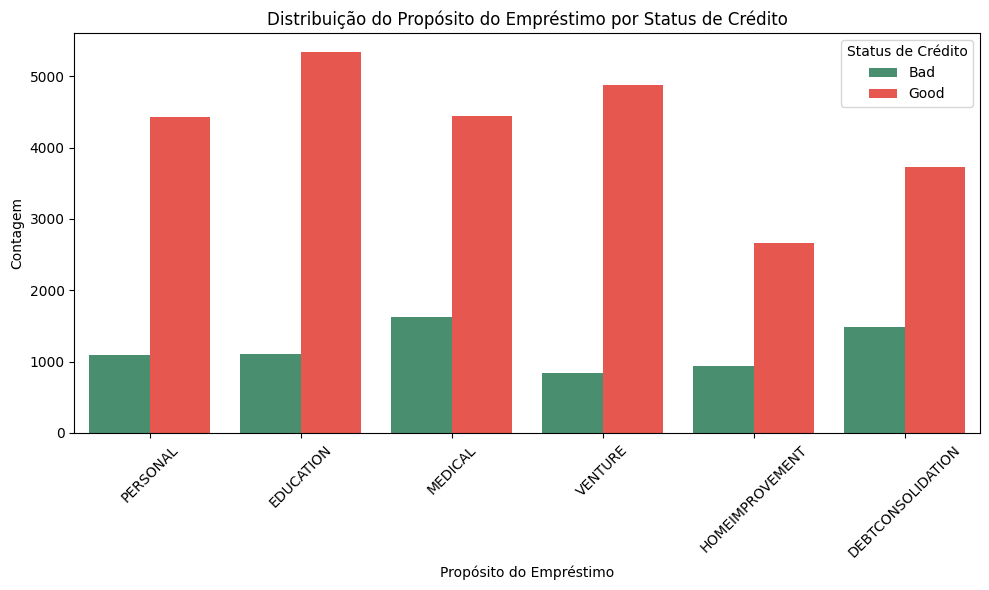

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

df_credit["loan_status"] = df_credit["loan_status"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df_credit, x="loan_intent", hue="loan_status",
              palette={ "#3D9970","#FF4136"})

plt.title("Distribuição do Propósito do Empréstimo por Status de Crédito")
plt.xlabel("Propósito do Empréstimo")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.legend(title="Status de Crédito")
plt.tight_layout()
plt.show()


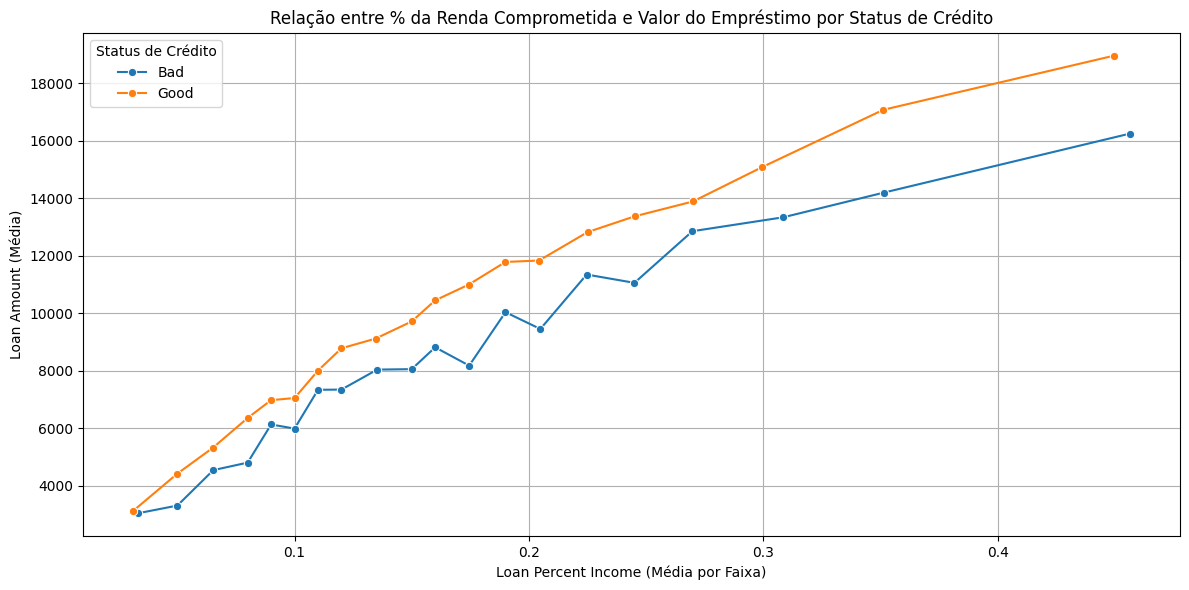

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df_credit["faixa_percent_income"] = pd.qcut(df_credit["loan_percent_income"], q=20, duplicates='drop')

df_grouped = df_credit.groupby(["faixa_percent_income", "loan_status"]).agg({
    "loan_amnt": "mean",
    "loan_percent_income": "mean"
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_grouped, x="loan_percent_income", y="loan_amnt", hue="loan_status", marker="o")

plt.title("Relação entre % da Renda Comprometida e Valor do Empréstimo por Status de Crédito")
plt.xlabel("Loan Percent Income (Média por Faixa)")
plt.ylabel("Loan Amount (Média)")
plt.legend(title="Status de Crédito")
plt.grid(True)
plt.tight_layout()
plt.show()


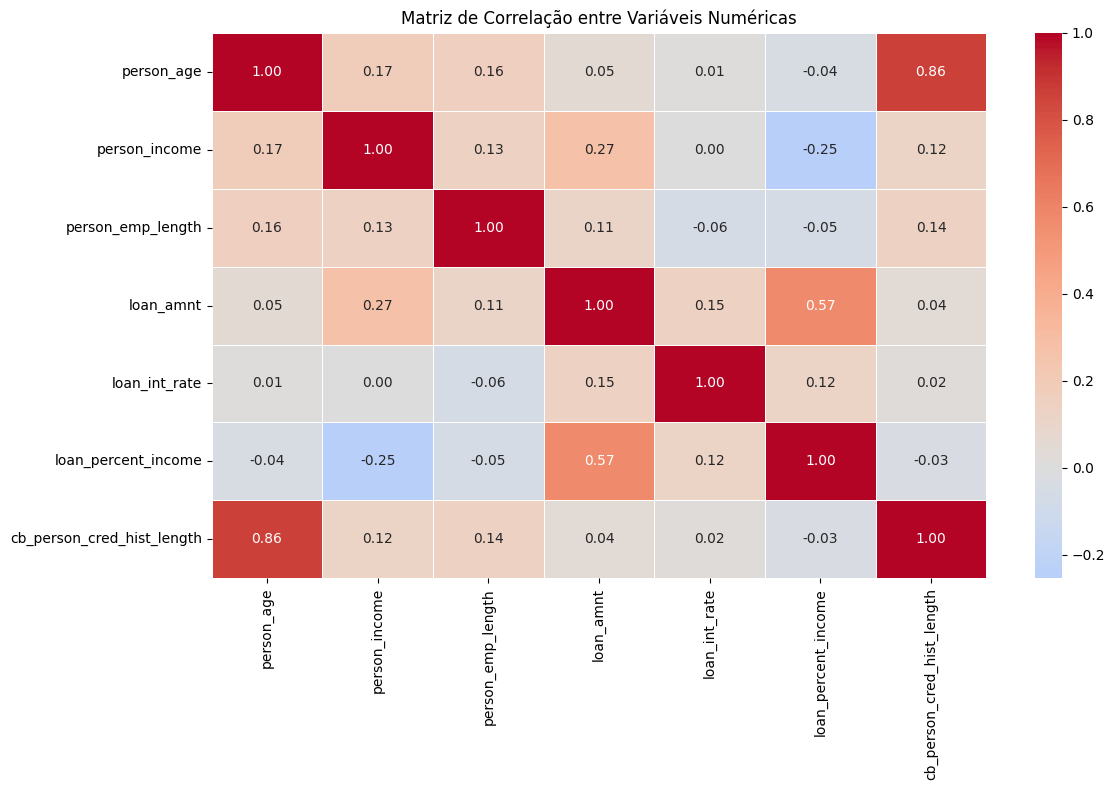

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico = df_credit.select_dtypes(include=['float64', 'int64'])

correlation_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()
